In [1]:
import pyfits as pf
import h5py
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))
palette = itertools.cycle(sns.color_palette())

/software/local/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
cosmos = pf.open("data/KiDS.x.zCOSMOS.fits")[1].data
gama = pf.open("data/KiDSxGAMAequ+G23.fits")[1].data
sdss = pf.open("data/KiDS.DR3.x.SDSS.DR13.galaxies.fits")[1].data
deep = pf.open("data/KiDS-like.x.DEEP2.DR4.fits")[1].data

In [3]:
mask = np.where(np.in1d(sdss['ID'] , gama['ID'])==False)
sdss = sdss[mask]
#getting rid of sdss galaxies that are in GAMA

All these catalogs have different formats. The goal is to combine them and make a consistent catalog of spectroscopic redshifts and KiDS photometry of galaxies. 

In [544]:
def cosmos_reduction():
    
    data = cosmos

    data = data[data['NIMAFLAGS_ISO_THELI']&01010111==0]

    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Zspec']
    RA = data['RA_THELI']
    DEC = data['DEC_THELI']

    u_g = data['MAG_GAAP_u_CALIB'] - data['MAG_GAAP_g_CALIB']
    g_r = data['MAG_GAAP_g_CALIB'] - data['MAG_GAAP_r_CALIB']
    r_i = data['MAG_GAAP_r_CALIB'] - data['MAG_GAAP_i_CALIB']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col 

In [4]:
def deep_reduction():
    
    data = deep
    data = data[data['NIMAFLAGS_ISO_THELI']&01010111==0]
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Zspec']
    RA = data['RA_THELI']
    DEC = data['DEC_THELI']

    u_g = data['MAG_GAAP_u_CALIB'] - data['MAG_GAAP_g_CALIB']
    g_r = data['MAG_GAAP_g_CALIB'] - data['MAG_GAAP_r_CALIB']
    r_i = data['MAG_GAAP_r_CALIB'] - data['MAG_GAAP_i_CALIB']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col

In [6]:
def gama_reduction():
    
    data = gama
    
    data = data[data['IMAFLAGS_ISO_U']&01010111==0]
    data = data[data['IMAFLAGS_ISO_G']&01010111==0]
    data = data[data['IMAFLAGS_ISO_R']&01010111==0]
    data = data[data['IMAFLAGS_ISO_I']&01010111==0]
    
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]
    
    data = data[data['MAG_GAAP_u_CALIB']<25.4]
    data = data[data['MAG_GAAP_g_CALIB']<25.6]
    data = data[data['MAG_GAAP_r_CALIB']<24.7]
    data = data[data['MAG_GAAP_i_CALIB']<24.5]
    
    u = data['MAG_GAAP_u_CALIB']
    g = data['MAG_GAAP_g_CALIB']
    r = data['MAG_GAAP_r_CALIB']
    i = data['MAG_GAAP_i_CALIB']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Z']
    RA = data['RA']
    DEC = data['DEC']

    u_g = data['COLOR_GAAPHOM_U_G']
    g_r = data['COLOR_GAAPHOM_G_R']
    r_i = data['COLOR_GAAPHOM_R_I']
    
    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col

def sdss_reduction():
    
    data = sdss
    
    data = data[data['IMAFLAGS_ISO_U']&01010111==0]
    data = data[data['IMAFLAGS_ISO_G']&01010111==0]
    data = data[data['IMAFLAGS_ISO_R']&01010111==0]
    data = data[data['IMAFLAGS_ISO_I']&01010111==0]
    
    data = data[data['MAGERR_GAAP_U']>0]
    data = data[data['MAGERR_GAAP_G']>0]
    data = data[data['MAGERR_GAAP_R']>0]
    data = data[data['MAGERR_GAAP_I']>0]

    u = data['MAG_GAAP_U'] + data['ZPT_OFFSET_U'] - data['EXT_SFD_U']
    g = data['MAG_GAAP_G'] + data['ZPT_OFFSET_G'] - data['EXT_SFD_G']
    r = data['MAG_GAAP_R'] + data['ZPT_OFFSET_R'] - data['EXT_SFD_R']
    i = data['MAG_GAAP_I'] + data['ZPT_OFFSET_I'] - data['EXT_SFD_I']
    
    mask = (u<25.4)&(g<25.6)&(r<24.7)&(i<24.5) 
    
    data = data[mask]
    
    u = data['MAG_GAAP_U'] + data['ZPT_OFFSET_U'] - data['EXT_SFD_U']
    g = data['MAG_GAAP_G'] + data['ZPT_OFFSET_G'] - data['EXT_SFD_G']
    r = data['MAG_GAAP_R'] + data['ZPT_OFFSET_R'] - data['EXT_SFD_R']
    i = data['MAG_GAAP_I'] + data['ZPT_OFFSET_I'] - data['EXT_SFD_I']
    
    uerr = data['MAGERR_GAAP_U']
    gerr = data['MAGERR_GAAP_G']
    rerr = data['MAGERR_GAAP_R']
    ierr = data['MAGERR_GAAP_I']

    Z = data['Z']
    RA = data['RA']
    DEC = data['DEC']

    u_g = data['COLOR_GAAPHOM_U_G']
    g_r = data['COLOR_GAAPHOM_G_R']
    r_i = data['COLOR_GAAPHOM_R_I']

    col = np.vstack([u,g,r,i,uerr,gerr,rerr,ierr,u_g,g_r,r_i,Z,RA,DEC])
    
    return col


In [553]:
dp = gama_reduction()
dp = np.hstack([gama_reduction() , sdss_reduction()])
#dp = np.hstack([gama_reduction() , sdss_reduction() , cosmos_reduction()])
zdp = dp[11,:]

In [554]:
mask = (zdp>.68) & (zdp<.7)
dpp = dp[:,mask]
print dpp.shape

(14, 490)


In [549]:
from astroML.density_estimation import XDGMM
from matplotlib.patches import Ellipse
from astroML.plotting.tools import draw_ellipse

In [570]:
Y = np.vstack([dpp[3,:], dpp[9,:]]).T
##Y = np.vstack([dpp[3,:], dpp[10,:]]).T

Yerr = np.zeros((Y.shape[0] , 2 , 2))

Yerr[:,0,0] = dpp[7,:]
Yerr[:,1,1] = (dpp[5,:]**2 + dpp[6,:]**2)**1
##Yerr[:,1,1] = (dpp[6,:]**2 + dpp[7,:]**2)**1

In [571]:
clf = XDGMM(2, n_iter=400)
clf.fit(Y, Yerr)

/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/usr/lib64/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_den

1.78234446527
0.0129184492369


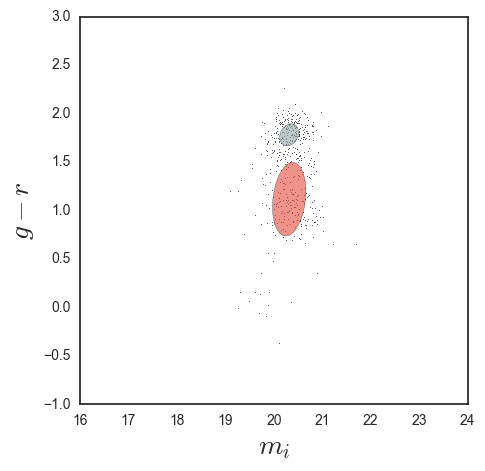

In [572]:
print clf.mu[0,1]
print clf.V[0,1,1]
plt.figure(figsize=(5,5))
plt.scatter(dpp[3,:] , dpp[9,:] , s = 0.1)
##plt.scatter(dpp[3,:] , dpp[10,:] , s = 0.1)
for i in range(2):
    draw_ellipse(clf.mu[i], clf.V[i] , scales=[1] , ec='k', fc=next(palette) , alpha = 0.6)
plt.xlim([16,24])
plt.ylim([-1,3])
plt.xlabel(r"$m_{i}$" , fontsize = 20)
plt.ylabel(r"$g-r$" , fontsize = 20)

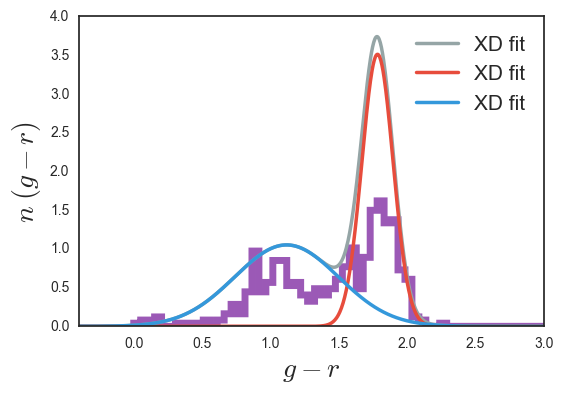

In [573]:
from scipy.stats import norm
bins = np.linspace(0,3,60)
plt.hist(Y[:,1] , normed=True , histtype="step" , lw = 5 , bins=bins)
x = np.linspace(-1,3,1000)
plt.plot(x , norm.pdf(x, clf.mu[0,1], clf.V[0,1,1]**.5) + norm.pdf(x, clf.mu[1,1], clf.V[1,1,1]**.5), label = "XD fit")
plt.plot(x , norm.pdf(x, clf.mu[0,1], clf.V[0,1,1]**.5), label = "XD fit")
plt.plot(x , norm.pdf(x, clf.mu[1,1], clf.V[1,1,1]**.5), label = "XD fit")

plt.xlabel(r"$g-r$" , fontsize = 20)
plt.ylabel(r"$n\;(g-r)$" , fontsize = 20)
plt.xlim(-0.4,3)
plt.legend(fontsize = 15)

In [574]:
import scipy as sc
import scipy.linalg as linalg

mask = Y[:,1] > mu_gr.max() - 2. * var_gr.min()**.5 
#print clf.mu.shape , clf.V.shape
red_index = np.where(clf.mu[:,1] == clf.mu[:,1].max())[0]
#print red_index
mu_red , V_red= clf.mu[red_index] , clf.V[red_index][0]
#print V_red
#print mu_red , V_red
dY_red = Y - mu_red
V_red_inv = np.linalg.inv(V_red)

VdY = np.tensordot(V_red_inv, dY_red , axes=(1,1))
#print VdY.shape
chi = np.sum(dY_red.T * VdY , axis = 0)
#print chi
mask = chi<2
#print dY_red.shape
#np.dot(dY_red[3,:] , np.dot(np.linalg.inv(V_red) , dY_red[3,:]))
#(dY_red*np.linalg.inv(V_red)[:,:,None]*dY_red).shape
#np.dot((dY_red).T , np.linalg.solve(V_red[:,:,None] , dY_red))

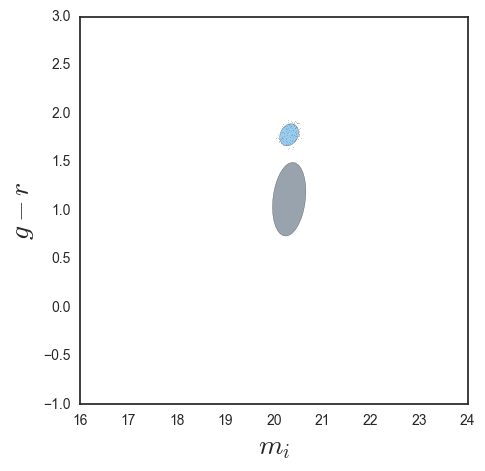

In [575]:
plt.figure(figsize=(5,5))
plt.scatter(Y[mask,0] , Y[mask,1] , s = 0.01)
for i in range(2):
    draw_ellipse(clf.mu[i],
                 clf.V[i] , scales=[1] , ec='k', fc=next(palette) , alpha = 0.5)
plt.xlim([16,24])
plt.ylim([-1,3])
plt.xlabel(r"$m_{i}$" , fontsize = 20)
plt.ylabel(r"$g-r$" , fontsize = 20)

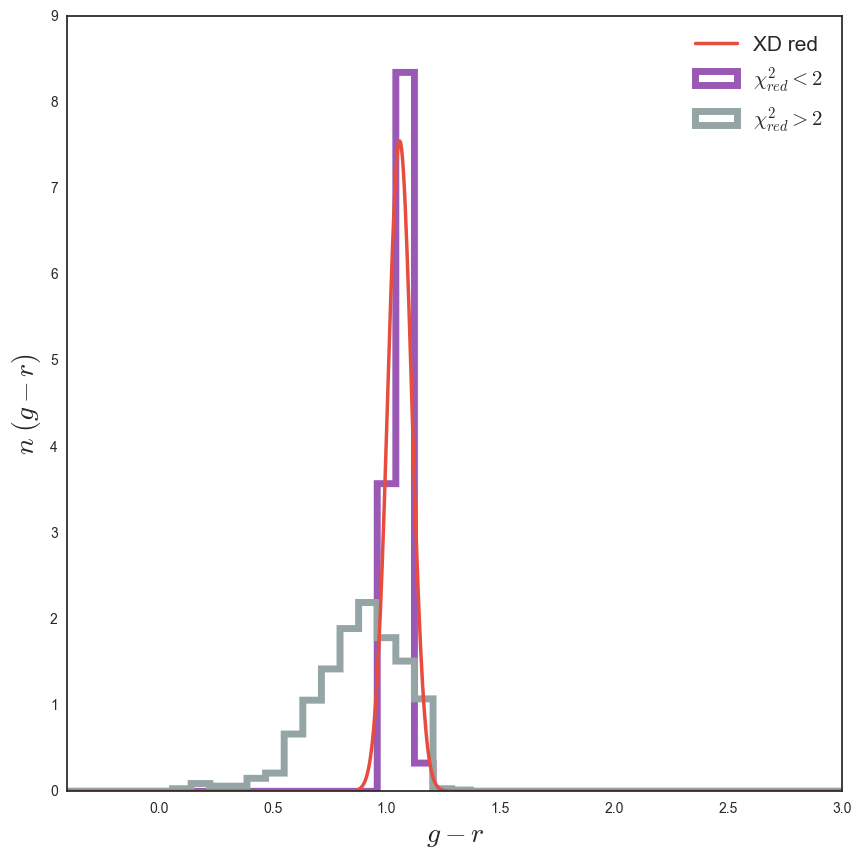

In [538]:
plt.figure(figsize=(10,10))
bins = np.linspace(-1,3,50)
plt.hist(Y[mask,1] , normed=True , histtype="step" , lw = 5 , bins=bins , label = "$\chi_{red}^2<2$")
plt.hist(Y[~mask,1] , normed=True , histtype="step" , lw = 5 , bins=bins, label = "$\chi_{red}^2>2$")
x = np.linspace(-1,3,1000)
plt.plot(x , norm.pdf(x, mu_red[0,1], V_red[1,1]**.5) , label = "XD red")
plt.xlabel(r"$g-r$" , fontsize = 20)
plt.ylabel(r"$n\;(g-r)$" , fontsize = 20)
plt.xlim(-0.4,3)
plt.legend(loc = "best" , fontsize = 15)

(16, 23)

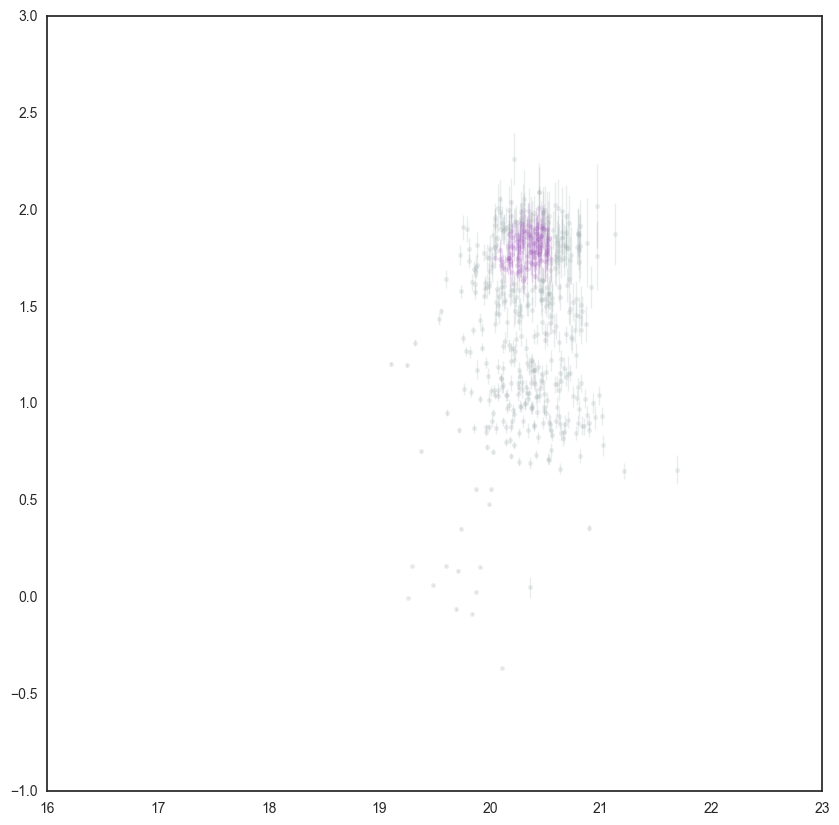

In [576]:
plt.figure(figsize=(10,10))
plt.errorbar(Y[mask,0], Y[mask,1] , yerr= Yerr[mask,1,1]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
plt.errorbar(Y[~mask,0], Y[~mask,1] , yerr= Yerr[~mask,1,1]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
plt.ylim(-1,3)
plt.xlim(16,23)

In [579]:
def lnlike(theta, x, y, yerr ,xref):
    m, b, lnf = theta
    model = m * (x-xref) + b
    #inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    inv_sigma2 = 1.0/(yerr**2 + np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [0.0, mu_red[0,1], np.log(V_red[1,1]**.5)], args=(Y[mask,0], Y[mask,1], Yerr[mask,1,1]**.5,mu_red[0,0]))
m_ml, b_ml, lnf_ml = result["x"]

0.198464866517 1.78888259836 4.78084335463e-07 20.3147574228


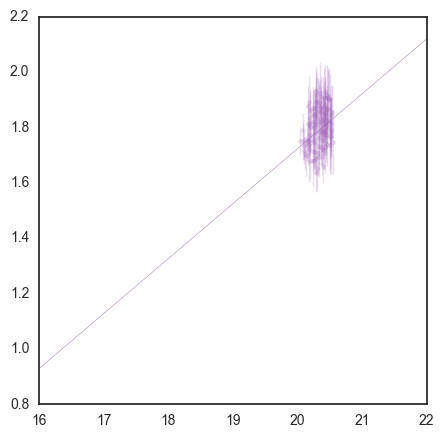

In [580]:
print m_ml , b_ml , np.exp(lnf_ml) , mu_red[0,0]
plt.figure(figsize=(5,5))
mi = np.linspace(16,22,1000)
plt.errorbar(Y[mask,0], Y[mask,1] , yerr= Yerr[mask,1,1]**.5 , 
             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
#plt.errorbar(Y[~mask,0], Y[~mask,1] , yerr= Yerr[~mask,1,1]**.5 , 
#             fmt = '.' , capsize = 0, alpha =0.2 , elinewidth=1)
#plt.plot(mi , m_ml*(mi-mu_red[0,0]) + b_ml)

plt.fill_between(mi , m_ml*(mi-mu_red[0,0]) + b_ml - np.exp(lnf_ml)  , 
                 m_ml*(mi-mu_red[0,0]) + b_ml + np.exp(lnf_ml) , alpha = 0.5 , color = next(palette))
#plt.ylim(0.0,3.0)
#plt.xlim(19,21)

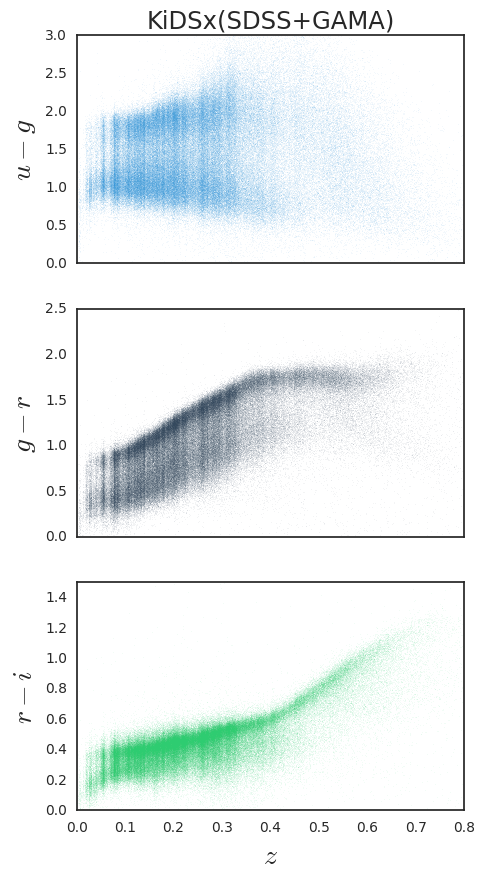

In [38]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))
ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.001 , color = next(palette))
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.001, color = next(palette))
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.001, color = next(palette))
ax[0].set_xlim(0,0.8)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])

ax[1].set_xlim(0,0.8)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])

ax[2].set_xlim(0,0.8)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA)" , fontsize = 17.5)


In [545]:
dpp = np.hstack([gama_reduction() , sdss_reduction() , cosmos_reduction()])
dc = cosmos_reduction()

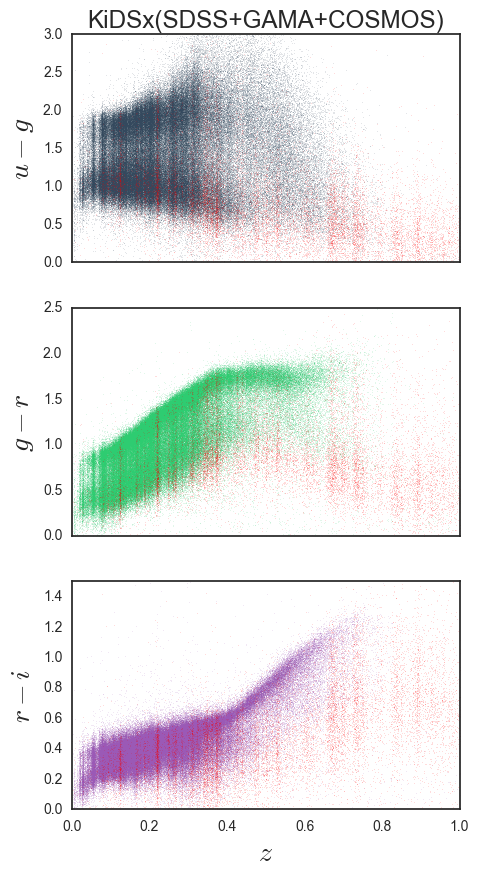

In [546]:
fig , ax = plt.subplots(nrows=3,ncols=1 , figsize=(5,10))

ax[0].scatter(dp[11,:] , dp[8,:] , s = 0.005 ,  color = next(palette))
ax[0].scatter(dc[11,:] , dc[8,:] , s = 0.005 , color = "r" , alpha = 1)
ax[1].scatter(dp[11,:] , dp[9,:] , s = 0.005,  color = next(palette))
ax[1].scatter(dc[11,:] , dc[9,:] , s = 0.005 , color = "r", alpha = 1)
ax[2].scatter(dp[11,:] , dp[10,:] , s = 0.005,  color = next(palette))
ax[2].scatter(dc[11,:] , dc[10,:] , s = 0.005 , color = "r", alpha = 1)

ax[0].set_xlim(0,1.0)
ax[0].set_ylim(0,3)
ax[0].set_xticks([])
ax[1].set_xlim(0,1.0)
ax[1].set_ylim(0,2.5)
ax[1].set_xticks([])
ax[2].set_xlim(0,1.0)
ax[2].set_ylim(0,1.5)
ax[2].set_xlabel(r"$z$" , fontsize = 20)
ax[0].set_ylabel(r"$u-g$" , fontsize = 20)
ax[1].set_ylabel(r"$g-r$" , fontsize = 20)
ax[2].set_ylabel(r"$r-i$" , fontsize = 20)

ax[0].set_title("KiDSx(SDSS+GAMA+COSMOS)" , fontsize = 17.5)
